Funds drawdown: cash balance remaining after monthly drawdown and interest payment

In [1]:
import logging
from datetime import datetime

import pandas as pd

from pytirement import draw_down_final, draw_down_table, scenario_plot

logging.basicConfig(level=logging.WARNING)

In [2]:
start_month = datetime(2025, 1, 1)  # Jan 2025
end_month = datetime(2044, 12, 1)  # Dec 2044

starting_balance = 2000000  # starting balance
annual_interest = 0.04  # annual rate, paid monthly
monthly_withdrawal = 7500  # estimate

In [3]:
out_df = draw_down_table(
    start_month, end_month, starting_balance, annual_interest, monthly_withdrawal
)

In [4]:
out_df

,Month,Remaining funds
Month Label,,
2025-01-01,1,1999141.7
2025-02-01,2,1998280.5
2025-03-01,3,1997416.4
2025-04-01,4,1996549.5
2025-05-01,5,1995679.6
...,...,...
2044-08-01,236,1692752.8
2044-09-01,237,1690870.3
2044-10-01,238,1688981.6


<Axes: xlabel='Month'>

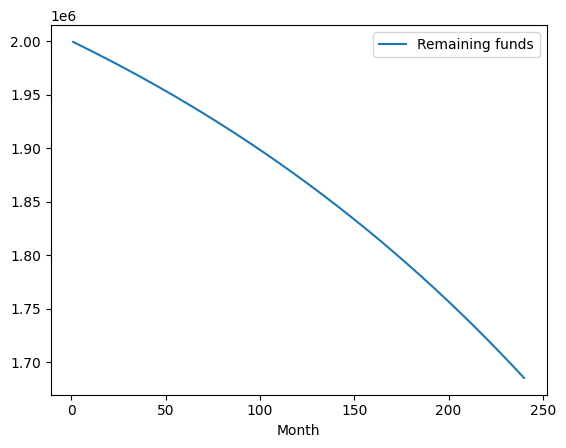

In [5]:
out_df.plot(x="Month", y="Remaining funds")

In [6]:
# Final balance: 4% rule

draw_down_final(
    start_month, end_month, starting_balance, 0.04, starting_balance * 0.04 / 12
)

{'start_year': 2025,
 'start_month': 1,
 'end_year': 2044,
 'end_month': 12,
 'start_balance': 2000000,
 'monthly_draw': 6666.7,
 'annual_interest': 0.04,
 'remaining_funds': 1991849.5}

In [7]:
print("*** Scenarios: funds remaining at end of month ***")

df = pd.DataFrame(
    {
        "4% rule": draw_down_final(
            start_month, end_month, starting_balance, 0.04, starting_balance * 0.04 / 12
        ),
        "Basic": draw_down_final(start_month, end_month, starting_balance, 0.04, 7500),
        "Increase draw": draw_down_final(
            start_month, end_month, starting_balance, 0.04, 8000
        ),
        "No interest": draw_down_final(
            start_month, end_month, starting_balance, 0, 7500
        ),
        "Reduced interest": draw_down_final(
            start_month, end_month, starting_balance, 0.03, 7500
        ),
        "Live large": draw_down_final(
            start_month, end_month, starting_balance, 0.04, 10000
        ),
    }
).T

df

*** Scenarios: funds remaining at end of month ***


,start_year,start_month,end_year,end_month,start_balance,monthly_draw,annual_interest,remaining_funds
4% rule,2025.0,1.0,2044.0,12.0,2000000.0,6666.7,0.04,1991849.5
Basic,2025.0,1.0,2044.0,12.0,2000000.0,7500.0,0.04,1685185.1
Increase draw,2025.0,1.0,2044.0,12.0,2000000.0,8000.0,0.04,1501186.5
No interest,2025.0,1.0,2044.0,12.0,2000000.0,7500.0,0.00,200000.0
Reduced interest,2025.0,1.0,2044.0,12.0,2000000.0,7500.0,0.03,1173089.3
Live large,2025.0,1.0,2044.0,12.0,2000000.0,10000.0,0.04,765192.1


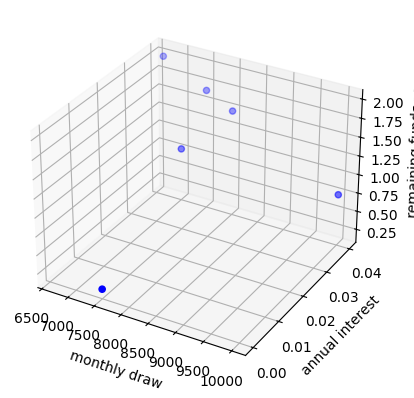

In [8]:
scenario_plot(df)